<a href="https://colab.research.google.com/github/omkart0124/Exploratory-Data-Analysis/blob/main/Shark_Tank_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('Shark Tank India Dataset.csv')
df.head()

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [ ]:
df.shape

(117, 28)

In [ ]:
df.columns

Index(['episode_number', 'pitch_number', 'brand_name', 'idea', 'deal',
       'pitcher_ask_amount', 'ask_equity', 'ask_valuation', 'deal_amount',
       'deal_equity', 'deal_valuation', 'ashneer_present', 'anupam_present',
       'aman_present', 'namita_present', 'vineeta_present', 'peyush_present',
       'ghazal_present', 'ashneer_deal', 'anupam_deal', 'aman_deal',
       'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal',
       'total_sharks_invested', 'amount_per_shark', 'equity_per_shark'],
      dtype='object')

In [ ]:
df.info()#---------------8 Float...2 Objects and 17 Int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   episode_number         117 non-null    int64  
 1   pitch_number           117 non-null    int64  
 2   brand_name             117 non-null    object 
 3   idea                   117 non-null    object 
 4   deal                   117 non-null    int64  
 5   pitcher_ask_amount     117 non-null    float64
 6   ask_equity             117 non-null    float64
 7   ask_valuation          117 non-null    float64
 8   deal_amount            117 non-null    float64
 9   deal_equity            117 non-null    float64
 10  deal_valuation         117 non-null    float64
 11  ashneer_present        117 non-null    int64  
 12  anupam_present         117 non-null    int64  
 13  aman_present           117 non-null    int64  
 14  namita_present         117 non-null    int64  
 15  vineet

In [ ]:
#df.describe()

In [ ]:
df.isnull().sum()#--------------from the output , we can say that the data is simple as it does not have missing values

episode_number           0
pitch_number             0
brand_name               0
idea                     0
deal                     0
pitcher_ask_amount       0
ask_equity               0
ask_valuation            0
deal_amount              0
deal_equity              0
deal_valuation           0
ashneer_present          0
anupam_present           0
aman_present             0
namita_present           0
vineeta_present          0
peyush_present           0
ghazal_present           0
ashneer_deal             0
anupam_deal              0
aman_deal                0
namita_deal              0
vineeta_deal             0
peyush_deal              0
ghazal_deal              0
total_sharks_invested    0
amount_per_shark         0
equity_per_shark         0
dtype: int64

1- Ashneer Grover:

Managing Director and Co-founder of BharatPe


2- Aman Gupta:

Co-founder and Chief Marketing Officer of boAt

3- Anupam Mittal:

Founder and CEO of Shaadi.com and People Group


4- Ghazal Alagh:

Co-founder and Chief Mama of MamaEarth


5- Namita Thapar:

Executive Director of Emcure Pharmaceuticals


6- Peyush Bansal

Co-founder and CEO of Lenskart


7- Vineeta Singh

CEO and co-founder of SUGAR Cosmetics

Present : was present during the pitching ; 1 - YES, 0 - NO


Deal :  is a part of Final Deal ; 1 - YES, 0 - NO

In [ ]:
df.columns[11:17]#---------------- names of sharks participated

Index(['ashneer_present', 'anupam_present', 'aman_present', 'namita_present',
       'vineeta_present', 'peyush_present'],
      dtype='object')

In [ ]:
len(df.columns[11:17])#---------------No of sharks participated

6

In [ ]:
df["brand_name"].nunique()# ----------------- no of entrepreneurs were present

117

In [ ]:
for i in df.columns[18:25]:
    s=df[i].sum()
    print(i ," deal count : ",s)# -------------------- No of times each investors invest in the deal

ashneer_deal  deal count :  21
anupam_deal  deal count :  24
aman_deal  deal count :  28
namita_deal  deal count :  22
vineeta_deal  deal count :  15
peyush_deal  deal count :  27
ghazal_deal  deal count :  7


In [ ]:
l=[]
for i in df.columns[18:25]:
    x=df[df[i]==1]
    s=x["amount_per_shark"].sum()
    l.append(s)
    print(i,"invested ",s,"amount")

    
#--Amount Invested each shark

ashneer_deal invested  494.33333333 amount
anupam_deal invested  533.83360253 amount
aman_deal invested  887.500016693 amount
namita_deal invested  648.333602533 amount
vineeta_deal invested  328.3333333300001 amount
peyush_deal invested  719.6669191630001 amount
ghazal_deal invested  130.0002525 amount


In [ ]:
l=[]
for i in df.columns[18:25]:
    x=df[df[i]==1]
    s=x["equity_per_shark"].sum()
    l.append(s)
    print(i,"gets total ",s,"equity")

    #----Total equity for each shark

ashneer_deal gets total  93.249999999 equity
anupam_deal gets total  166.35 equity
aman_deal gets total  160.263333334 equity
namita_deal gets total  134.78333333400002 equity
vineeta_deal gets total  131.533333333 equity
peyush_deal gets total  315.84999999999997 equity
ghazal_deal gets total  46.7 equity


In [ ]:
df1=df[df["deal"]==1]
df1[["brand_name","idea"]]#------------Total 65 deals are accepted with there names and ideas

,brand_name,idea
0,BluePine Industries,Frozen Momos
1,Booz scooters,Renting e-bike for mobility in private spaces
2,Heart up my Sleeves,Detachable Sleeves
3,Tagz Foods,Healthy Potato Chips
7,Peeschute,Disposable Urine Bag
...,...,...
106,Colour Me Mad,Insoles
108,Tweek Labs,Sportswear
109,Proxgy,VR
110,Nomad Food Project,Bacon Jams


In [ ]:
df['deal'].value_counts()#----How Many deals done

1    65
0    52
Name: deal, dtype: int64

In [ ]:
df['aman_present'].value_counts()#------ How many times aman was present in pitching and so on

1    98
0    19
Name: aman_present, dtype: int64

In [ ]:
df['anupam_present'].value_counts()

1    117
Name: anupam_present, dtype: int64

In [ ]:
df['ashneer_present'].value_counts()

1    98
0    19
Name: ashneer_present, dtype: int64

In [ ]:
df['ghazal_present'].value_counts()

0    91
1    26
Name: ghazal_present, dtype: int64

In [ ]:
df['peyush_present'].value_counts()

1    88
0    29
Name: peyush_present, dtype: int64

In [ ]:
df['namita_present'].value_counts()

1    106
0     11
Name: namita_present, dtype: int64

In [ ]:
aman_present = len(df[df.aman_present == 1])#---len of present of each shark
anupam_present = len(df[df.anupam_present == 1])
ashneer_present = len(df[df.ashneer_present == 1])
ghazal_present = len(df[df.ghazal_present == 1])
namita_present = len(df[df.namita_present == 1])
peyush_present = len(df[df.peyush_present == 1])
vineeta_present = len(df[df.vineeta_present == 1])

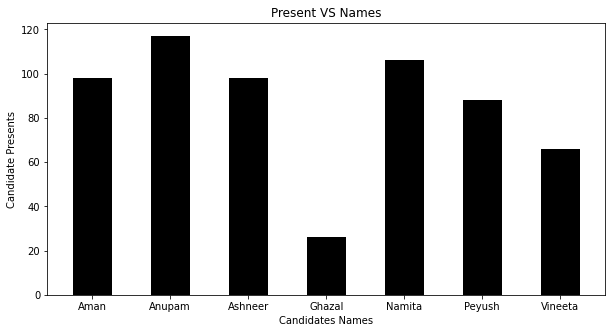

In [ ]:
fig = plt.figure(figsize=(10,5))
present = [aman_present,anupam_present,ashneer_present,ghazal_present,
           namita_present,peyush_present,vineeta_present]
          
names=['Aman','Anupam','Ashneer','Ghazal','Namita','Peyush','Vineeta']
plt.bar(names,present,color='black',width=0.5)
plt.xlabel("Candidates Names")
plt.ylabel("Candidate Presents")
plt.title("Present VS Names")
plt.show()

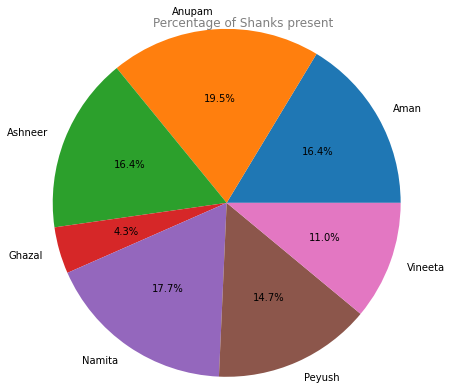

In [ ]:
plt.pie(present,labels=names,radius=2.0,autopct='%0.1f%%')
plt.suptitle("Percentage of Shanks present", x=0.55,y=1.15,color='grey')
plt.show()

In [ ]:
df['aman_deal'].value_counts()#----No of deals done by Aman

0    89
1    28
Name: aman_deal, dtype: int64

In [ ]:
df['anupam_deal'].value_counts()

0    93
1    24
Name: anupam_deal, dtype: int64

In [ ]:
df['ashneer_deal'].value_counts()

0    96
1    21
Name: ashneer_deal, dtype: int64

In [ ]:
df['ghazal_deal'].value_counts()

0    110
1      7
Name: ghazal_deal, dtype: int64

In [ ]:
df['namita_deal'].value_counts()

0    95
1    22
Name: namita_deal, dtype: int64

In [ ]:
df['peyush_deal'].value_counts()

0    90
1    27
Name: peyush_deal, dtype: int64

In [ ]:
df['vineeta_deal'].value_counts()

0    102
1     15
Name: vineeta_deal, dtype: int64

In [ ]:
aman_deal = len(df[df.aman_deal == 1])# ---Len of aman's deal
anupam_deal = len(df[df.anupam_deal == 1])
ashneer_deal = len(df[df.ashneer_deal == 1])
ghazal_deal = len(df[df.ghazal_deal == 1])
namita_deal = len(df[df.namita_deal == 1])
peyush_deal = len(df[df.peyush_deal == 1])
vineeta_deal = len(df[df.vineeta_deal == 1])

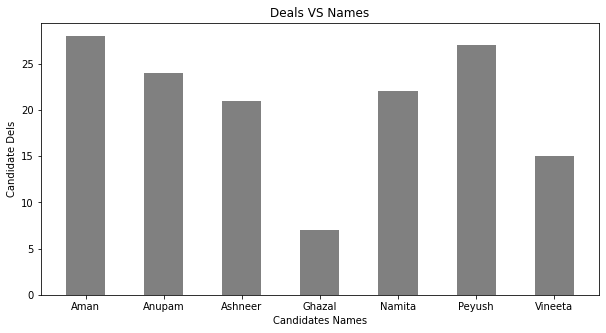

In [ ]:
fig = plt.figure(figsize=(10,5))
Deal = [aman_deal,anupam_deal,ashneer_deal,ghazal_deal,
           namita_deal,peyush_deal,vineeta_deal]
          
names=['Aman','Anupam','Ashneer','Ghazal','Namita','Peyush','Vineeta']
plt.bar(names,Deal,color='grey',width=0.5)
plt.xlabel("Candidates Names")
plt.ylabel("Candidate Dels")
plt.title("Deals VS Names")
plt.show()

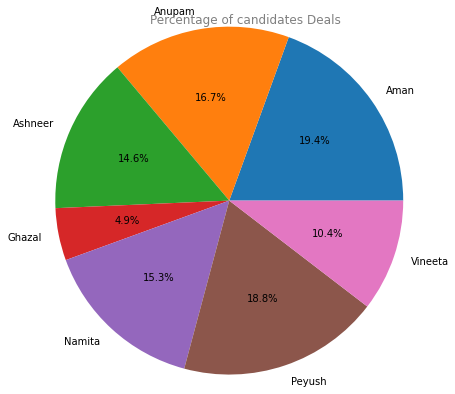

In [ ]:
plt.pie(Deal,labels=names,radius=2.0,autopct='%0.1f%%')
plt.suptitle("Percentage of Sharks Deals done", x=0.55,y=1.15,color='grey')
plt.show()

In [ ]:
aman_present = (aman_deal/aman_present)*100
anupam_present = (anupam_deal/anupam_present)*100
ashneer_present = (ashneer_deal/ashneer_present)*100
ghazal_present = (ghazal_deal/ghazal_present)*100
namita_present = (namita_deal/namita_present)*100
peyush_present = (peyush_deal/peyush_present)*100
vineeta_present = (vineeta_deal/vineeta_present)*100

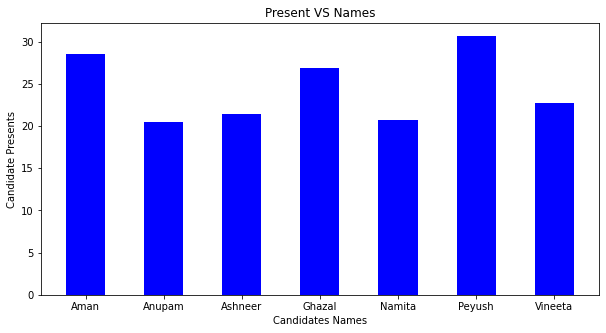

In [ ]:
fig = plt.figure(figsize=(10,5))
Percentage = [aman_present,anupam_present,ashneer_present,ghazal_present,
           namita_present,peyush_present,vineeta_present]
          
Names=['Aman','Anupam','Ashneer','Ghazal','Namita','Peyush','Vineeta']
plt.bar(Names,Percentage,color='blue',width=0.5)
plt.xlabel("Sharks Names")
plt.ylabel("Candidate Presents")
plt.title("Present VS Names")
plt.show()

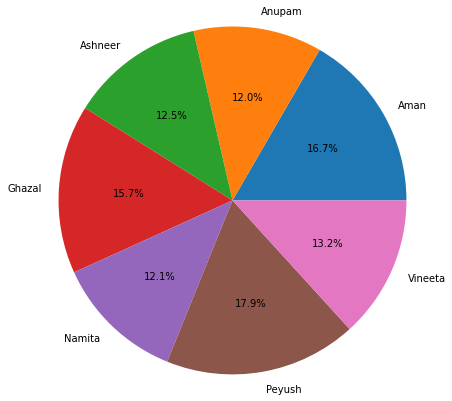

In [ ]:
plt.pie(Percentage,labels=names,radius=2.0,autopct='%0.1f%%')
plt.show()

Creating a new dataset of successfull deals

In [ ]:
df1=df[df["deal"]==1]
df1

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,1,0,0,0,0,0,0,1,70.0,2.750000
7,3,8,Peeschute,Disposable Urine Bag,1,75.0,4.0,1875.00,75.0,6.00,...,0,0,1,0,0,0,0,1,75.0,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,33,107,Colour Me Mad,Insoles,1,40.0,10.0,400.00,40.0,25.00,...,0,0,0,1,0,0,0,1,40.0,25.000000
108,33,109,Tweek Labs,Sportswear,1,40.0,2.0,2000.00,60.0,10.00,...,1,1,0,0,0,1,0,3,20.0,3.333333
109,33,110,Proxgy,VR,1,35.0,1.0,3500.00,10.0,10.00,...,1,0,0,0,0,1,0,2,5.0,5.000000
110,34,111,Nomad Food Project,Bacon Jams,1,40.0,10.0,400.00,40.0,20.00,...,1,0,0,1,1,0,1,4,10.0,5.000000


In [ ]:
#----Highest amount of deal


print("maximum deal amount",x[x["deal_amount"]==x["deal_amount"].max()]["deal_amount"])

maximum deal amount 79    100.0
88    100.0
Name: deal_amount, dtype: float64


In [ ]:
df1[df1["deal_amount"]==df1["deal_amount"].max()]#----------all details of highest deal

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
50,17,51,Aas Vidyalaya,EdTech App,1,150.0,3.0,5000.0,150.0,15.0,...,1,0,0,1,0,1,0,3,50.0,5.0


In [ ]:
df1["deal_amount"].sum()#------------Sum of amount invested by sharks

3642.00106

In [ ]:
print("Highest amount invested per shark",df1["amount_per_shark"].max())#------------Highest amount invested per shark

Highest amount invested per shark 100.0


In [ ]:
print("Highest % of equity  per shark ",df1["equity_per_shark"].max())#------------Highest no of equity by per shark

Highest % of equity  per shark  75.0
